<h1>Nomes do Brasil</h1>

<p>Esse notebook se destina a oferecer uma visão sobre os principais nomes utilizados no Brasil.</p>

## Importações
<p>Principais bibliotecas do Python utilizadas, e também arquivos do projeto.</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import time
import ast

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from src.principal import AcessoAPINomeIBGE
from itertools import chain
from PIL import Image

## Arquivos Externos
<p>Localização dos arquivos que serão utilizados, basicamente os arquivos da pasta data, os .csv as imagens</p>

In [2]:
states = 'data/estados.csv'
cities = 'data/municipios.csv'
apis_ibge = 'data/links_APIs.csv'
brazil_country_image = 'img/Mapa_do_Brasil_com_a_Bandeira_Nacional.png'

## Inicializando alguns objetos

### Carregando as string de conexão

In [3]:
pr = AcessoAPINomeIBGE(apis_ibge)

In [4]:
pr.fn_captar_strings_conexao_arquivo_csv()

### String Captadas

In [5]:
pr.lst_apis_ibge

['https://servicodados.ibge.gov.br/api/v2/censos/nomes/{nomes}',
 'https://servicodados.ibge.gov.br/api/v2/censos/nomes/{nomes}?sexo={sexo}',
 'https://servicodados.ibge.gov.br/api/v2/censos/nomes/{nomes}?groupBy=UF',
 'https://servicodados.ibge.gov.br/api/v2/censos/nomes/{nomes}?localidade={municipioEstado}',
 'https://servicodados.ibge.gov.br/api/v2/censos/nomes/ranking',
 'https://servicodados.ibge.gov.br/api/v2/censos/nomes/ranking/?decada={decada}',
 'https://servicodados.ibge.gov.br/api/v2/censos/nomes/ranking?localidade={municipioEstado}',
 'https://servicodados.ibge.gov.br/api/v2/censos/nomes/ranking/?sexo={sexo}']

## Ranking dos nomes mais utilizados

### Exibir algumas informações da função que se comunica com a API

In [6]:
print(pr.fn_IBGE_listar_ranking_dos_nomes_mais_frequentes.__doc__)


            Function: função que retorna uma lista com o rank dos nomes mais frequentes
    
            Args:
    
            Return:
                int: resposta http
                list: lista com as informações
        


### Tratamento de Dados

In [7]:
# Captar as informações da API e armazena-las em uma lista
int_response, lst_names_ranking = pr.fn_IBGE_listar_ranking_dos_nomes_mais_frequentes()

In [8]:
# Usando uma list comprehesion, para captar apenas uma lista de nomes
lst_names_ranking_aux = [ra['res'] for ra in lst_names_ranking]

In [9]:
# Exibir informações da lista
lst_names_ranking_aux[0][0:3]

[{'nome': 'MARIA', 'frequencia': 11734129, 'ranking': 1},
 {'nome': 'JOSE', 'frequencia': 5754529, 'ranking': 2},
 {'nome': 'ANA', 'frequencia': 3089858, 'ranking': 3}]

In [10]:
# Gerar um dataframe com a lista captada
df_names_ranking = pd.DataFrame(list(chain.from_iterable(lst_names_ranking_aux)))

In [11]:
df_names_ranking.head(3)

,frequencia,nome,ranking
0,11734129,MARIA,1
1,5754529,JOSE,2
2,3089858,ANA,3


In [12]:
# Dimensão do DataFrame
df_names_ranking.shape

(20, 3)

In [13]:
# Remover a coluna ranking
df_names_ranking.drop(['ranking'], 
                      axis = 1,
                      inplace = True) 

# Renomear as colunas
df_names_ranking.rename(columns = {'nome': 'Name', 
                                   'frequencia': 'Frequency'},
                        inplace = True)

# Para Garantir certa consistencia na plotagem de barras, tornar todas as colunas do tipo striug
df_names_ranking.columns = list(map(str, df_names_ranking.columns))

# Fazer com que o propŕio nome seja o indice do dataframe
df_names_ranking.set_index('Name', inplace = True)


In [14]:
df_names_ranking.head(2)

,Frequency
Name,
MARIA,11734129
JOSE,5754529


### Plotagem de Barras com os nomes mais utilizados

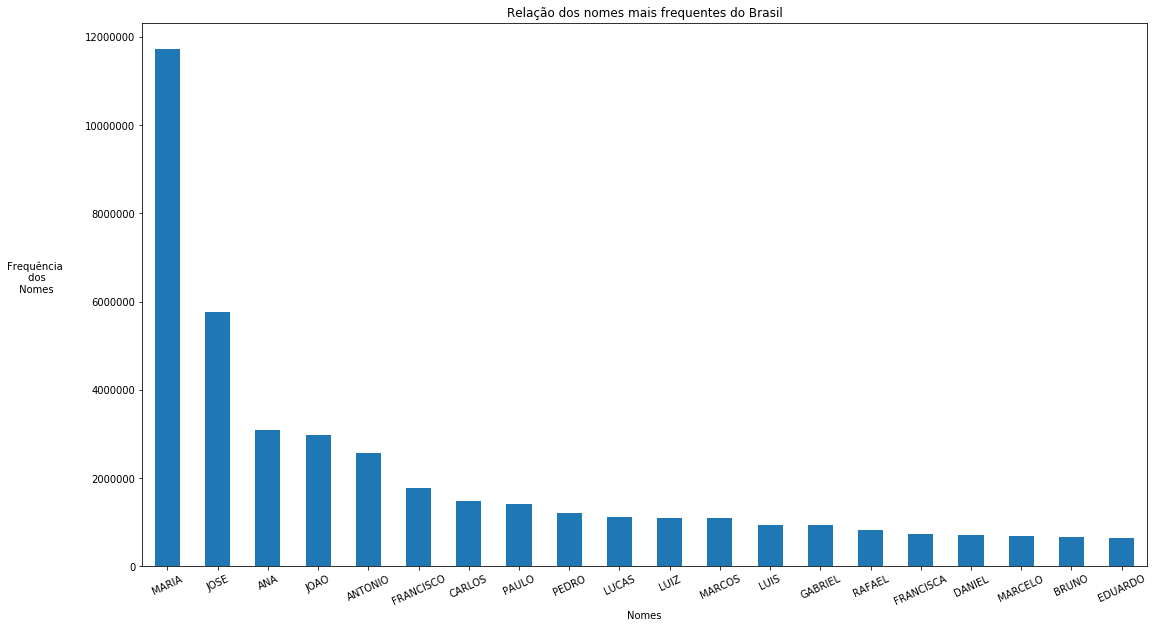

In [15]:
# Confogurando o gráfico
df_names_ranking.plot(kind = "bar", 
                      figsize = (18, 10),
                      legend = None
                     )
# Configurar o gráfico para que ele desconsidere a notação científica
plt.ticklabel_format(style = 'plain', 
                     axis = 'y')

# Titulo
plt.title("Relação dos nomes mais frequentes do Brasil")

# Legenda do Eixo X
plt.xlabel("Nomes")

# Rotacionar os dados do Eixo X
plt.xticks(rotation = 25)

# Legenda do Eixo Y
plt.ylabel("Frequência\n dos\n Nomes", 
           labelpad = 50, # Afastamento em relação ao dados do Eixo Y
           rotation = 0 # Rotação do texto 
          )


# Mostrar o Gráfico
plt.show()


### Wordcloud com os Nomes mais Utilizados
<p>Dado o fato que, o que possuimos dos nomes mais frequentes do Brasil se tratam exclusivamente de uma tabela com o nome e sua frequencia, que precisaremos montar uma estrutura simples para utilizar a Wordcloud, pois ela conta a frequencia das palavras em um texto, mas no nosso caso essa frequencia ja esta contada</p>

#### Tratando os Dados

In [16]:
# Criar uma variavel com a frequencial total de todos os nomes 
var_int_frequencia_total = df_names_ranking['Frequency'].sum()
var_str_texto = ''

# O pulo do gato no codigo vai ser criar um texto onde cada nome aparecerá baseado na frequencia 
maximo_palavras = 100
for nome in df_names_ranking.index.values:
    # Ver se tem nome Composto
    if len(nome.split(' ')) == 1:
        repeat_num_times = int(df_names_ranking.loc[nome, 'Frequency']/float(var_int_frequencia_total)*maximo_palavras)
        var_str_texto = var_str_texto + ((nome + ' ') * repeat_num_times)
                                     
# Mostrar o Texto Gerado
var_str_texto


'MARIA MARIA MARIA MARIA MARIA MARIA MARIA MARIA MARIA MARIA MARIA MARIA MARIA MARIA MARIA MARIA MARIA MARIA MARIA MARIA MARIA MARIA MARIA MARIA MARIA MARIA MARIA MARIA JOSE JOSE JOSE JOSE JOSE JOSE JOSE JOSE JOSE JOSE JOSE JOSE JOSE ANA ANA ANA ANA ANA ANA ANA JOAO JOAO JOAO JOAO JOAO JOAO JOAO ANTONIO ANTONIO ANTONIO ANTONIO ANTONIO ANTONIO FRANCISCO FRANCISCO FRANCISCO FRANCISCO CARLOS CARLOS CARLOS PAULO PAULO PAULO PEDRO PEDRO LUCAS LUCAS LUIZ LUIZ MARCOS MARCOS LUIS LUIS GABRIEL GABRIEL RAFAEL FRANCISCA DANIEL MARCELO BRUNO EDUARDO '

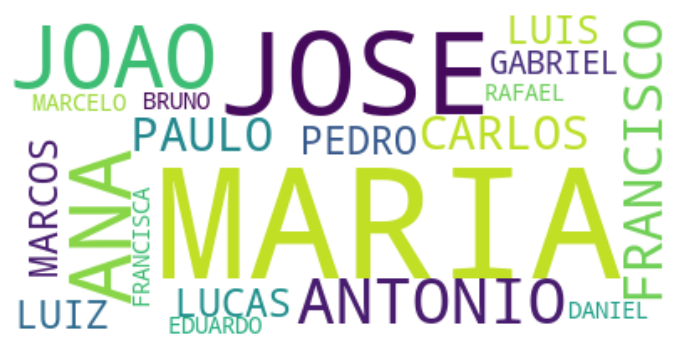

In [17]:
# Criar o Objeto com os nomes
wordcloud = WordCloud(background_color='white', # Cor de Fundo
                      collocations=False # Desconsiderar Palavras repetidas
                     ).generate(var_str_texto) # Fonte que no cso é a variavel texto

# Configurações da Figura
fig = plt.figure()
fig.set_figwidth(12)
fig.set_figheight(18)

plt.imshow(wordcloud, 
           interpolation='bilinear')

plt.axis('off')
plt.show()

<p>Uma vez montado a Wordcloud com os nomes mais frequenctes, poderíamos também aplicar uma mascara pois os nomes mais frequentes são do Brasil, logo estes poderiam estar incluidos em uma imagem da extensão terrritorial do pais.</p>

In [18]:
# Tranformar a imagem do brazil em um array
brazil_mask = np.array(Image.open(brazil_country_image))

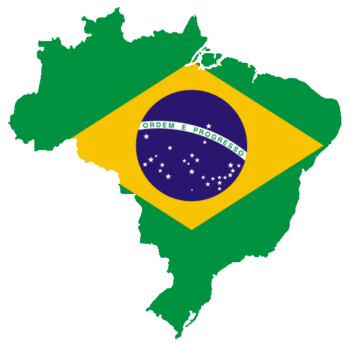

In [19]:
# Validar se a imagem foi carregada
fig = plt.figure()
fig.set_figwidth(6) # set width
fig.set_figheight(10) # set height

plt.imshow(brazil_mask, 
           cmap = plt.cm.gray, 
           interpolation='bilinear')

plt.axis('off')
plt.show()

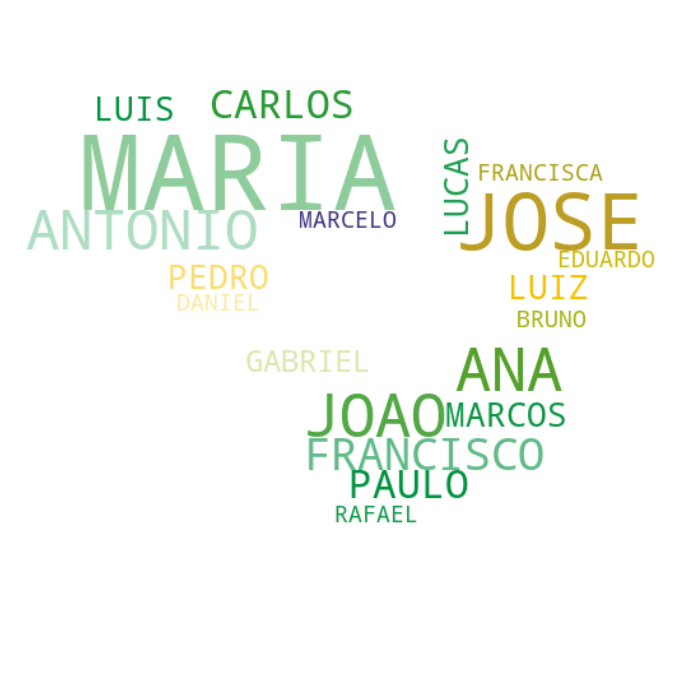

In [20]:
# Criar o Objeto Word Cloud com algumas configurações e já setando a mascara, que é a imagem do Brasil
brazil_word_cloud = WordCloud(background_color = 'white', # Cor de Fundo
                              collocations = False, # Desconsiderar textos repetidos
                              max_words = 20, # Máximo de palavras mostradas
                              mask = brazil_mask, # Mascara
                              max_font_size = 90, # Tamanho de Fonte maximo
                              random_state = 42)

# Atribuir ao Objeto Word Cloud o Texto com os nomes mais frequentes
brazil_word_cloud.generate(var_str_texto)

# Como a imagem esta com a cor da bandeira, os nomes assumiram essa cor conforme seja distribuidos nela
image_colors = ImageColorGenerator(brazil_mask)

# Dimensões da imagem
fig = plt.figure()
fig.set_figwidth(12) 
fig.set_figheight(18) 

# Gerando a Imagem
plt.imshow(brazil_word_cloud.recolor(color_func = image_colors), # Recolorir a imagem conforme a cor da mascara 
           interpolation='bilinear')

# Ocultar as margens
plt.axis('off')

# Mostrar a imagem
plt.show()

## Ranking dos nomes mais utilizados por década

<p>Será feita uma analise dos nomes mais utilizados entres as décadas de 1930 e 2010</p>

In [21]:
print(pr.fn_IBGE_listar_ranking_dos_nomes_mais_frequentes_por_decada.__doc__)


            Function: função que retorna uma lista com os nomes mais frequentes usados em uma determinada decada
    
            Args:
                int: decada a ser pesquisada
            Return:
                int: resposta http
                list: lista com as informações da frequencia do nome
        


<p>Uma vez obtido a informação dos nomes mais utilizados em uma década, podemos utilizar uma estrutura para trazer todos de uma vez, sem precisar replicar o mesmo código n vezes</p>

In [22]:
lst_decadas = [1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010]
lst_names_ranking_aux = []
lst_names_ranking = []
for dec in lst_decadas:
    int_response, lst_names_ranking_aux = pr.fn_IBGE_listar_ranking_dos_nomes_mais_frequentes_por_decada(dec)
    if int_response == 200: # OK
        for es in lst_names_ranking_aux:
            es.update( {"decada":dec}) 
        lst_names_ranking += lst_names_ranking_aux
    # 1 Segundo de espera até a próxima requisição
    time.sleep(1)

<p>Foi gerada uma lista unidimensional onde cada 'linha' possui uma lista com as informações da API, e ao mesmo tempo, foi acrescido uma chave com a informação da década de referência <p>

In [23]:
lst_names_ranking[0:1]

[{'localidade': 'BR',
  'sexo': None,
  'res': [{'nome': 'MARIA', 'frequencia': 336477, 'ranking': 1},
   {'nome': 'JOSE', 'frequencia': 118121, 'ranking': 2},
   {'nome': 'ANTONIO', 'frequencia': 60651, 'ranking': 3},
   {'nome': 'JOAO', 'frequencia': 60155, 'ranking': 4},
   {'nome': 'ANA', 'frequencia': 33395, 'ranking': 5},
   {'nome': 'FRANCISCO', 'frequencia': 33338, 'ranking': 6},
   {'nome': 'MANOEL', 'frequencia': 28241, 'ranking': 7},
   {'nome': 'FRANCISCA', 'frequencia': 27317, 'ranking': 8},
   {'nome': 'ANTONIA', 'frequencia': 22746, 'ranking': 9},
   {'nome': 'PEDRO', 'frequencia': 21483, 'ranking': 10},
   {'nome': 'JOSEFA', 'frequencia': 19421, 'ranking': 11},
   {'nome': 'RAIMUNDO', 'frequencia': 17300, 'ranking': 12},
   {'nome': 'SEBASTIAO', 'frequencia': 17299, 'ranking': 13},
   {'nome': 'RAIMUNDA', 'frequencia': 16455, 'ranking': 14},
   {'nome': 'ROSA', 'frequencia': 15097, 'ranking': 15},
   {'nome': 'JOANA', 'frequencia': 14520, 'ranking': 16},
   {'nome': 'JO

Pra facilitar a confecção do dataframe, será gerada uma nova lista, onde cada nome e sua respectiva, frequência virá acompanhado de sua dácada de referência

In [24]:
lst_names_rankink_decade = []
# Iterar a Lista decada por decada, que no caso, foram 9 decadas computadas
for decada in lst_names_ranking:
    # Iterar a lista nome por nome, que no caso foram 20 frequencias por decada
    for i_nome in range(20):
        dic_names_ranking_decade ={ "nome":str(decada['res'][i_nome]['nome']),
                                    "frequencia": int(decada['res'][i_nome]['frequencia']),
                                    "ranking": int(decada['res'][i_nome]['ranking']),
                                    "decada": int(decada['decada'])}
        lst_names_rankink_decade.append(dic_names_ranking_decade)
        

In [25]:
lst_names_rankink_decade[0:2]

[{'nome': 'MARIA', 'frequencia': 336477, 'ranking': 1, 'decada': 1930},
 {'nome': 'JOSE', 'frequencia': 118121, 'ranking': 2, 'decada': 1930}]

### Dataframe com o ranking dos nomes mais utilizados por decada


In [26]:
df_names_ranking_dec = pd.DataFrame(lst_names_rankink_decade)

In [27]:
df_names_ranking_dec.head(5)

,decada,frequencia,nome,ranking
0,1930,336477,MARIA,1
1,1930,118121,JOSE,2
2,1930,60651,ANTONIO,3
3,1930,60155,JOAO,4
4,1930,33395,ANA,5


### Plotagem de Barras com a frequencia do nome 'Maria' ao longo das décadas

In [28]:
# Pendente